In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'distil(roberta)-urdu'
MODEL_NAME = 'distilroberta-base'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['urdu_text'].values
val_texts = val_df['urdu_text'].values
test_texts = test_df['urdu_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

آپ کو کس نے لہروں میں لہر بنانی ہے؟ [0 0 0 1 0]
وہ کتیا بالکل ٹھیک لگ رہا ہے. [0 1 0 0 0]
ہم اب سارے پلیٹ فارم پر، تو اگلی بار جب آپ ایک بری کتیا کے ساتھ ایک خوبصورت عورت سے رابطہ کرتے ہیں، جو آپ کو پسند ہے، وہ آپ کو مختلف طریقے سے بتا سکتے ہیں [0 1 0 0 0]
صرف ایک بال کی گولی مل گئی، کسی نے مجھے میری کتیا سے لے سکتا ہے [0 1 0 0 0]
@ReallyVirtual-اسای ٹی وی پی ٹی کے مطابق اگر تمام Y ایسا محسوس کرتا ہے کہ وہ ایسا کر سکتے ہیں. اس وقت کیا کر سکتے ہیں. [0 0 0 1 0]


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

آپ کو کس نے لہروں میں لہر بنانی ہے؟ [0 0 0 1 0]
وہ کتیا بالکل لگ رہا [0 1 0 0 0]
ہم اب سارے پلیٹ فارم پر، اگلی بار جب آپ بری کتیا ساتھ خوبصورت عورت سے رابطہ ہیں، جو آپ کو پسند ہے، وہ آپ کو مختلف سے بتا سکتے [0 1 0 0 0]
صرف بال گولی مل گئی، کسی نے مجھے میری کتیا سے سکتا [0 1 0 0 0]
reallyvirtualاسای ٹی وی پی ٹی مطابق اگر تمام y ایسا محسوس کرتا وہ ایسا کر سکتے اس وقت کیا کر سکتے [0 0 0 1 0]


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="urdu") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="urdu") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="urdu") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.60it/s, loss=0.35] 


Train loss 0.3875604014673668 accuracy 0.11514954486345903
Validation loss 0.343634749636238 accuracy 0.23990637799882972
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.23990637799882972
Epoch 1/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.66it/s, loss=0.307]


Train loss 0.33404517346892615 accuracy 0.28208712613784137
Validation loss 0.3236498902609319 accuracy 0.3435732397113322
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.3435732397113322
Epoch 2/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.55it/s, loss=0.305]


Train loss 0.32093554945407565 accuracy 0.3159297789336801
Validation loss 0.315556193575447 accuracy 0.3768285547103569
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.3768285547103569
Epoch 3/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.64it/s, loss=0.304]


Train loss 0.3142021848700353 accuracy 0.35221066319895966
Validation loss 0.3103754564567848 accuracy 0.38170470060464207
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.38170470060464207
Epoch 4/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.55it/s, loss=0.293]


Train loss 0.3086644194680131 accuracy 0.37925877763328997
Validation loss 0.30789928708547426 accuracy 0.39555295494441195
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.39555295494441195
Epoch 5/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.74it/s, loss=0.293]


Train loss 0.30304974002214885 accuracy 0.40302340702210665
Validation loss 0.3086660279903883 accuracy 0.43358689291983615
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.43358689291983615
Epoch 6/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.75it/s, loss=0.277]


Train loss 0.2994999301878743 accuracy 0.42480494148244474
Validation loss 0.30923996810559873 accuracy 0.44324166179052077
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.44324166179052077
Epoch 7/50
----------


Training Progress: 100%|██████████| 241/241 [00:57<00:00,  4.23it/s, loss=0.257]


Train loss 0.29421633698386274 accuracy 0.44557867360208064
Validation loss 0.3093935486711102 accuracy 0.455334503608348
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.455334503608348
Epoch 8/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.63it/s, loss=0.244]


Train loss 0.28938560781389844 accuracy 0.46544213263979195
Validation loss 0.3118636819683475 accuracy 0.48351862687731617
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.48351862687731617
Epoch 9/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.69it/s, loss=0.244]


Train loss 0.2844538278723159 accuracy 0.4887516254876463
Validation loss 0.31402247629047914 accuracy 0.48254339769845916
No improvement in validation accuracy for 1 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.61it/s, loss=0.234]


Train loss 0.2791974287928387 accuracy 0.5062093628088427
Validation loss 0.31987146554905693 accuracy 0.4876145894285157
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.4876145894285157
Epoch 11/50
----------


Training Progress: 100%|██████████| 241/241 [00:53<00:00,  4.52it/s, loss=0.212]


Train loss 0.27444559793254647 accuracy 0.5208387516254877
Validation loss 0.3208685968025231 accuracy 0.501950458357714
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.501950458357714
Epoch 12/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.76it/s, loss=0.191]


Train loss 0.2702170449050136 accuracy 0.5328023407022107
Validation loss 0.3348025663031472 accuracy 0.5118977959820558
Model and tokenizer saved at epoch 12
Checkpoint saved: Improved validation accuracy at epoch 12: 0.5118977959820558
Epoch 13/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.71it/s, loss=0.198]


Train loss 0.26439054860613653 accuracy 0.5514304291287386
Validation loss 0.33003571813489185 accuracy 0.5077043105129706
No improvement in validation accuracy for 1 epochs.
Epoch 14/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.77it/s, loss=0.201]


Train loss 0.2609241956002485 accuracy 0.5642392717815344
Validation loss 0.33252299586196005 accuracy 0.5198946752486835
Model and tokenizer saved at epoch 14
Checkpoint saved: Improved validation accuracy at epoch 14: 0.5198946752486835
Epoch 15/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.73it/s, loss=0.182]


Train loss 0.25342114275916483 accuracy 0.5863784135240572
Validation loss 0.34738950302571425 accuracy 0.5271113711722255
Model and tokenizer saved at epoch 15
Checkpoint saved: Improved validation accuracy at epoch 15: 0.5271113711722255
Epoch 16/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.69it/s, loss=0.169]


Train loss 0.2493898419671039 accuracy 0.5964889466840052
Validation loss 0.35028540389037427 accuracy 0.5217476106885118
No improvement in validation accuracy for 1 epochs.
Epoch 17/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.75it/s, loss=0.16] 


Train loss 0.24426904054845516 accuracy 0.6076397919375812
Validation loss 0.34917365732016387 accuracy 0.523990637799883
No improvement in validation accuracy for 2 epochs.
Epoch 18/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.69it/s, loss=0.168]


Train loss 0.23863043231093536 accuracy 0.6221391417425227
Validation loss 0.36806570177460896 accuracy 0.536473571289253
Model and tokenizer saved at epoch 18
Checkpoint saved: Improved validation accuracy at epoch 18: 0.536473571289253
Epoch 19/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.66it/s, loss=0.16] 


Train loss 0.23239686473029283 accuracy 0.6359882964889467
Validation loss 0.36620084665439745 accuracy 0.5315974253949678
No improvement in validation accuracy for 1 epochs.
Epoch 20/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.67it/s, loss=0.161]


Train loss 0.22806284789969813 accuracy 0.64518855656697
Validation loss 0.3638217603718793 accuracy 0.5325726545738249
No improvement in validation accuracy for 2 epochs.
Epoch 21/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.55it/s, loss=0.128]


Train loss 0.22156098256219967 accuracy 0.6617360208062418
Validation loss 0.37541711845515685 accuracy 0.5358884337819387
No improvement in validation accuracy for 3 epochs.
Epoch 22/50
----------


Training Progress: 100%|██████████| 241/241 [00:53<00:00,  4.53it/s, loss=0.12] 


Train loss 0.2160012597426834 accuracy 0.6733420026007803
Validation loss 0.38557535777857277 accuracy 0.5306221962161107
No improvement in validation accuracy for 4 epochs.
Epoch 23/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.67it/s, loss=0.109]


Train loss 0.21251899226572504 accuracy 0.6799739921976593
Validation loss 0.3965690525961511 accuracy 0.5438853130485665
Model and tokenizer saved at epoch 23
Checkpoint saved: Improved validation accuracy at epoch 23: 0.5438853130485665
Epoch 24/50
----------


Training Progress: 100%|██████████| 241/241 [00:56<00:00,  4.27it/s, loss=0.1]  


Train loss 0.20707300849475307 accuracy 0.6892717815344603
Validation loss 0.39951310334382234 accuracy 0.5377413692217671
No improvement in validation accuracy for 1 epochs.
Epoch 25/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.75it/s, loss=0.101]


Train loss 0.2023571734297325 accuracy 0.7024382314694408
Validation loss 0.40117641657958797 accuracy 0.5464209089135947
Model and tokenizer saved at epoch 25
Checkpoint saved: Improved validation accuracy at epoch 25: 0.5464209089135947
Epoch 26/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.75it/s, loss=0.121]


Train loss 0.1951895522502448 accuracy 0.7144668400520156
Validation loss 0.41281705395675 accuracy 0.5435927442949093
No improvement in validation accuracy for 1 epochs.
Epoch 27/50
----------


Training Progress: 100%|██████████| 241/241 [00:52<00:00,  4.60it/s, loss=0.106]


Train loss 0.19043342824793455 accuracy 0.7242522756827048
Validation loss 0.41734366137304424 accuracy 0.5452506338989662
No improvement in validation accuracy for 2 epochs.
Epoch 28/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.70it/s, loss=0.0729]


Train loss 0.18571620743675352 accuracy 0.7315994798439532
Validation loss 0.4318010965247213 accuracy 0.5395943046615955
No improvement in validation accuracy for 3 epochs.
Epoch 29/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.75it/s, loss=0.0614]


Train loss 0.17828494608711404 accuracy 0.7469765929778933
Validation loss 0.44811607952471133 accuracy 0.5428125609518237
No improvement in validation accuracy for 4 epochs.
Epoch 30/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.75it/s, loss=0.0955]


Train loss 0.17579662091875473 accuracy 0.7517555266579974
Validation loss 0.4406852740564464 accuracy 0.5452506338989662
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


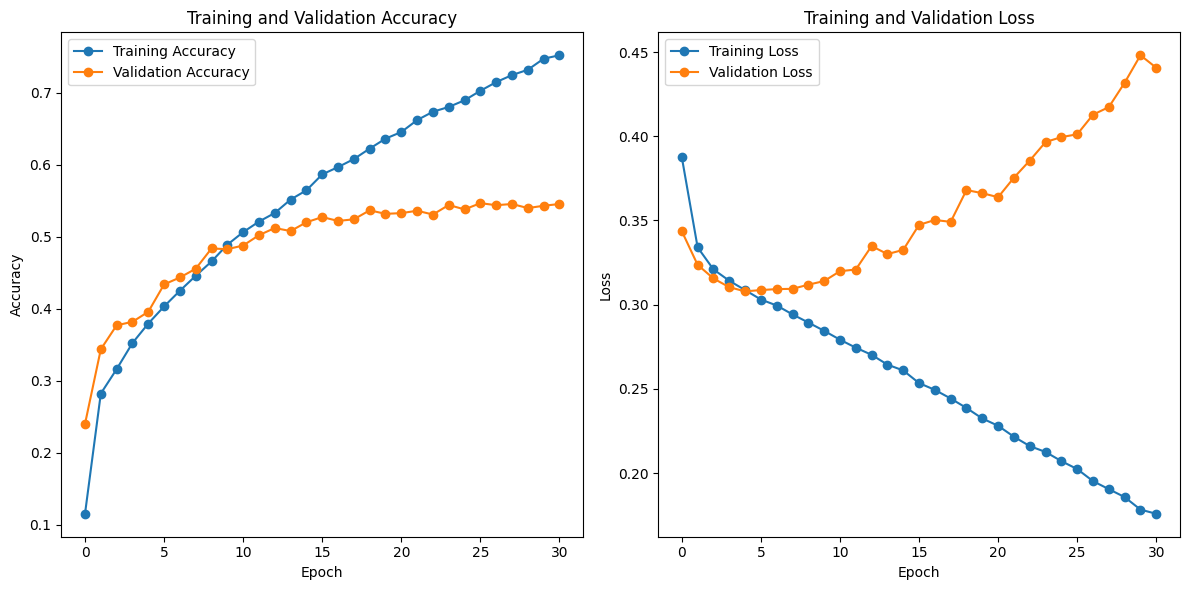

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.54 Test Loss: 0.45909781330897487


Accuracy: 0.54
F1 Score: 0.51
Precision: 0.52
Recall: 0.54

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.25      0.02      0.03      1076
     Gender/Sexual       0.59      0.56      0.57      3656
Origin/Nationality       0.07      0.14      0.09        65
    Race/Ethnicity       0.44      0.54      0.48      2827
          Religion       0.62      0.74      0.67      2630

          accuracy                           0.54     10254
         macro avg       0.39      0.40      0.37     10254
      weighted avg       0.52      0.54      0.51     10254



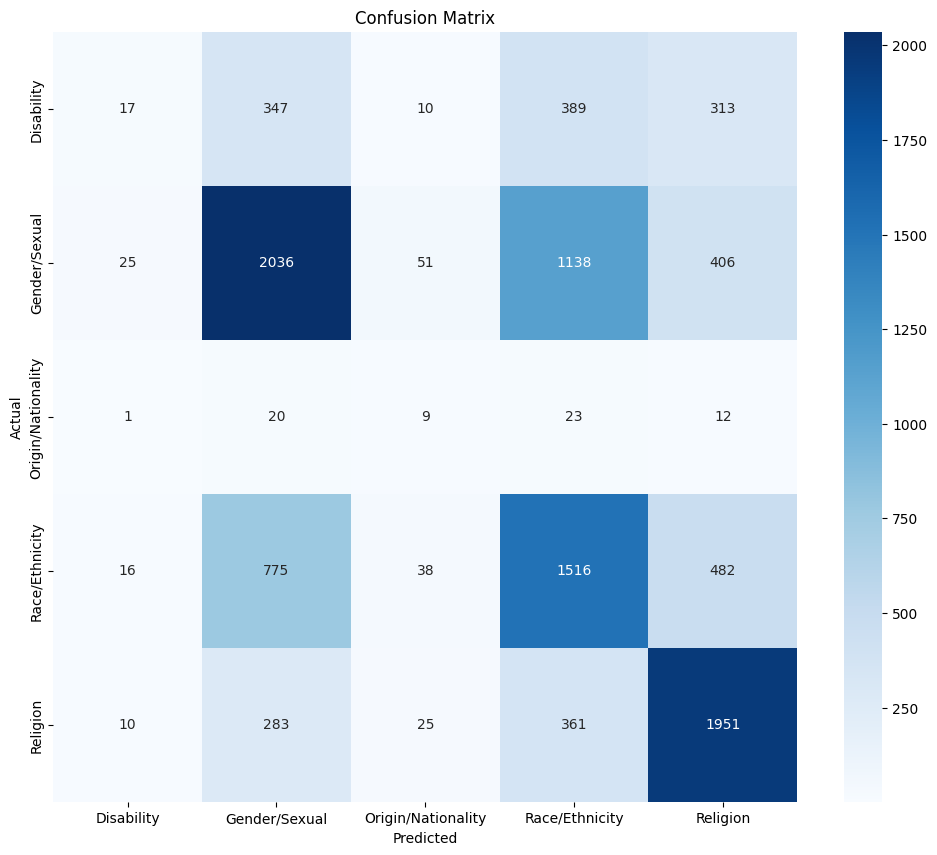

In [11]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Gender/Sexual with confidence: 1.00
